In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from scipy import stats
pd.set_option('display.max_columns', None)

df = pd.read_excel("TA2.xlsx")
display(df.head(5))




,Manufacturer,Screen Size,Pixel,Motion Rate,Overall Rating,Video Quality,Sound quality,Appearance,Number of Features,Ease of Set up,Life Span,Expert Overall Rating,"size=26""","size=32""","size=36""","size=40""","size=42""","size=46""","size=49""","size=52""","size=55""","size=60""",motionrate=120,motionrate=240,motionrate=600,Pixel=1080,Selling Price,Yearly units sold in US
0,LG,19,60,720,3.71,3.34,4.12,3.61,4.33,3.38,2.99,3.63,0,0,0,0,0,0,0,0,0,0,0,0,0,0,430,16041
1,LG,19,60,1080,3.66,3.30,4.07,4.12,4.55,4.08,3.04,3.42,0,0,0,0,0,0,0,0,0,0,0,0,0,1,535,16364
2,LG,19,120,720,3.72,3.38,4.37,4.07,4.11,3.40,3.13,3.77,0,0,0,0,0,0,0,0,0,0,1,0,0,0,495,15998
3,LG,19,120,1080,3.71,3.37,4.16,4.25,4.14,3.37,3.29,3.56,0,0,0,0,0,0,0,0,0,0,1,0,0,1,540,16214
4,LG,19,240,720,3.62,3.54,4.57,4.10,4.23,3.76,3.13,4.06,0,0,0,0,0,0,0,0,0,0,0,1,0,0,545,16343


In [2]:
#Dropping the categorical variables as we already have created dummy variables for them.
df.drop(['Screen Size', 'Pixel', 'Motion Rate'],axis = 1, inplace=True)

**Average ratings per feature by Manufacturer**

              Appearance  Ease of Set up  Life Span  Number of Features  \
Manufacturer                                                              
LG              3.971932        3.601591   3.100909            4.225341   
Panasonic       3.586818        4.211136   4.637045            3.814205   
Philips         4.025114        3.209659   3.595909            2.903636   
Samsung         4.220114        3.883636   4.491136            4.378636   
Sharp           3.461023        3.191705   3.382955            3.361136   
Sony            3.964659        3.728977   4.102045            3.236818   
Toshiba         3.482841        3.403409   3.509318            3.433636   
Vizio           3.127045        3.400795   3.542273            3.154205   

              Sound quality  Video Quality  
Manufacturer                                
LG                 4.209659       3.415795  
Panasonic          3.503295       4.378523  
Philips            3.889773       3.391364  
Samsung            4.204

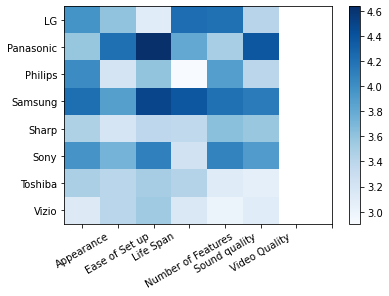

In [3]:
#pivot table for manufacturer vs user rating
pTable = pd.pivot_table(df,index='Manufacturer', aggfunc= np.mean,
                        values = ['Video Quality','Sound quality','Appearance','Number of Features','Ease of Set up','Life Span'])

print(pTable)
plt.imshow(pTable, cmap ='Blues',aspect='auto')
plt.colorbar()
plt.xticks(range(len(pTable)), pTable.columns,rotation = 30)
plt.yticks(range(len(pTable)), pTable.index)
plt.show()

**Ranking for each feature based on ratings by Manufacturer**

In [4]:
print("Ranking for each manufacturer for each feature based on ratings")
pTable.rank(ascending=False)

Ranking for each manufacturer for each feature based on ratings


,Appearance,Ease of Set up,Life Span,Number of Features,Sound quality,Video Quality
Manufacturer,,,,,,
LG,3.0,4.0,8.0,2.0,1.0,5.0
Panasonic,5.0,1.0,1.0,3.0,6.0,1.0
Philips,2.0,7.0,4.0,8.0,4.0,6.0
Samsung,1.0,2.0,2.0,1.0,2.0,2.0
Sharp,7.0,8.0,7.0,5.0,5.0,4.0
Sony,4.0,3.0,3.0,6.0,3.0,3.0
Toshiba,6.0,5.0,6.0,4.0,7.0,8.0
Vizio,8.0,6.0,5.0,7.0,8.0,7.0


**Linear regression (Yearly Units sold vs Other features)**

In [5]:
y = df['Yearly units sold in US']
x = df.drop(['Manufacturer','Selling Price','Yearly units sold in US'], 1)
# Linear Regression 
model = LinearRegression().fit(x, y)

var = x.columns.tolist()    
coef = model.coef_.tolist() 

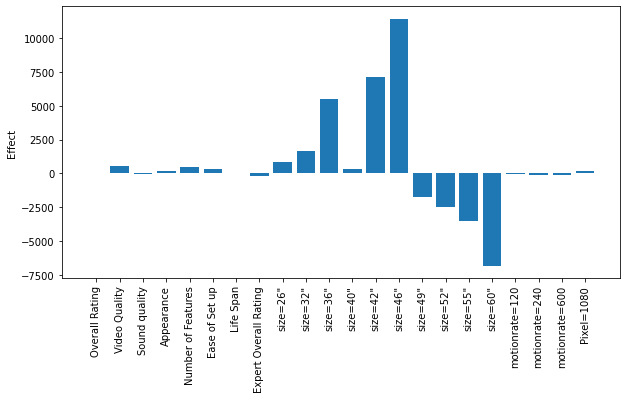

In [6]:
plt.figure(figsize=(10, 5))
plt.bar(var, coef)
plt.ylabel('Effect')
plt.xticks(rotation='vertical')
plt.show()

In [7]:
var.insert(0, 'Intercept')
coef.insert(0, model.intercept_)
out = pd.DataFrame({'Variable': var, 'Coefficient': coef})
out.sort_values(by=['Coefficient'], ascending=False)

,Variable,Coefficient
14,"size=46""",11428.233355
0,Intercept,11058.051963
13,"size=42""",7130.766951
11,"size=36""",5509.048185
10,"size=32""",1653.457914
9,"size=26""",868.593132
2,Video Quality,557.846898
5,Number of Features,444.933132
12,"size=40""",309.323551
6,Ease of Set up,291.533064


**Price Difference Calculation**

In [8]:
#OPTIONAL CREDIT

In [9]:
df = pd.read_excel("TA2.xlsx")
df['AvgSegmentPrice']= df.groupby(by=['Screen Size', 'Pixel', 'Motion Rate'])[['Selling Price']].transform('mean')
df['Price Diff'] = df['Selling Price'] - df['AvgSegmentPrice']
df.head()

,Manufacturer,Screen Size,Pixel,Motion Rate,Overall Rating,Video Quality,Sound quality,Appearance,Number of Features,Ease of Set up,Life Span,Expert Overall Rating,"size=26""","size=32""","size=36""","size=40""","size=42""","size=46""","size=49""","size=52""","size=55""","size=60""",motionrate=120,motionrate=240,motionrate=600,Pixel=1080,Selling Price,Yearly units sold in US,AvgSegmentPrice,Price Diff
0,LG,19,60,720,3.71,3.34,4.12,3.61,4.33,3.38,2.99,3.63,0,0,0,0,0,0,0,0,0,0,0,0,0,0,430,16041,438.750,-8.750
1,LG,19,60,1080,3.66,3.30,4.07,4.12,4.55,4.08,3.04,3.42,0,0,0,0,0,0,0,0,0,0,0,0,0,1,535,16364,528.750,6.250
2,LG,19,120,720,3.72,3.38,4.37,4.07,4.11,3.40,3.13,3.77,0,0,0,0,0,0,0,0,0,0,1,0,0,0,495,15998,490.625,4.375
3,LG,19,120,1080,3.71,3.37,4.16,4.25,4.14,3.37,3.29,3.56,0,0,0,0,0,0,0,0,0,0,1,0,0,1,540,16214,546.875,-6.875
4,LG,19,240,720,3.62,3.54,4.57,4.10,4.23,3.76,3.13,4.06,0,0,0,0,0,0,0,0,0,0,0,1,0,0,545,16343,553.750,-8.750


In [10]:
df.drop(['Screen Size', 'Pixel', 'Motion Rate', 'Selling Price' ,'AvgSegmentPrice'],1)

,Manufacturer,Overall Rating,Video Quality,Sound quality,Appearance,Number of Features,Ease of Set up,Life Span,Expert Overall Rating,"size=26""","size=32""","size=36""","size=40""","size=42""","size=46""","size=49""","size=52""","size=55""","size=60""",motionrate=120,motionrate=240,motionrate=600,Pixel=1080,Yearly units sold in US,Price Diff
0,LG,3.71,3.34,4.12,3.61,4.33,3.38,2.99,3.63,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16041,-8.750
1,LG,3.66,3.30,4.07,4.12,4.55,4.08,3.04,3.42,0,0,0,0,0,0,0,0,0,0,0,0,0,1,16364,6.250
2,LG,3.72,3.38,4.37,4.07,4.11,3.40,3.13,3.77,0,0,0,0,0,0,0,0,0,0,1,0,0,0,15998,4.375
3,LG,3.71,3.37,4.16,4.25,4.14,3.37,3.29,3.56,0,0,0,0,0,0,0,0,0,0,1,0,0,1,16214,-6.875
4,LG,3.62,3.54,4.57,4.10,4.23,3.76,3.13,4.06,0,0,0,0,0,0,0,0,0,0,0,1,0,0,16343,-8.750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,Toshiba,3.12,3.12,3.30,3.53,3.13,3.73,3.57,3.12,0,0,0,0,0,0,0,0,0,1,1,0,0,1,8853,-82.500
700,Toshiba,2.53,3.12,3.19,3.40,2.53,3.14,3.31,3.61,0,0,0,0,0,0,0,0,0,1,0,1,0,0,8100,-76.875
701,Toshiba,2.51,3.15,2.84,3.49,2.84,3.34,3.72,3.39,0,0,0,0,0,0,0,0,0,1,0,1,0,1,8477,-65.625
702,Toshiba,2.51,3.33,3.11,3.23,3.18,3.16,3.44,3.50,0,0,0,0,0,0,0,0,0,1,0,0,1,0,8337,-54.375


**Linear regression with Price difference values**

In [11]:
y = df['Yearly units sold in US']
x = df[df.columns.difference(['Manufacturer', 'Yearly units sold in US','Selling Price' ,'AvgSegmentPrice'])]

model = LinearRegression().fit(x, y)

var = x.columns.tolist()    
coef = model.coef_.tolist() 

var.insert(0, 'Intercept')
coef.insert(0, model.intercept_)
out = pd.DataFrame({'Variable': var, 'Coefficient': coef})
out.sort_values(by=['Coefficient'], ascending=False)

,Variable,Coefficient
22,"size=46""",11205.678801
0,Intercept,8761.782801
21,"size=42""",6937.196176
19,"size=36""",5356.500626
18,"size=32""",1545.520941
17,"size=26""",779.303146
13,Video Quality,592.096495
6,Number of Features,435.475665
2,Ease of Set up,311.936927
1,Appearance,214.748387
